**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Leonel Matus
*   MATRÍCULA: A01797557@tec.mx

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
os.chdir(DIR)

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [241]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [242]:
cereals_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [243]:
# Determinando la cantidad de valores únicos por columna
cereals_df.nunique()

,0
name,77
mfr,7
type,2
calories,11
protein,6
fat,5
sodium,27
fiber,13
carbo,21
sugars,16


In [244]:
## Numericas
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [245]:
##Texto
cereals_df.describe(include = 'object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


In [246]:
# Se hace una lista de variables numéricas y otra de categóricas
num_cols = cereals_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = cereals_df.select_dtypes(exclude=np.number).columns.tolist()

In [247]:
# Recuento de cada categoría única en las variables categóricas
for column in cat_cols:
    print(cereals_df[column].value_counts())
    print('-' * 50)

name
100%_Bran                    1
100%_Natural_Bran            1
All-Bran                     1
All-Bran_with_Extra_Fiber    1
Almond_Delight               1
                            ..
Triples                      1
Trix                         1
Wheat_Chex                   1
Wheaties                     1
Wheaties_Honey_Gold          1
Name: count, Length: 77, dtype: int64
--------------------------------------------------
mfr
K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: count, dtype: int64
--------------------------------------------------
type
C    74
H     3
Name: count, dtype: int64
--------------------------------------------------


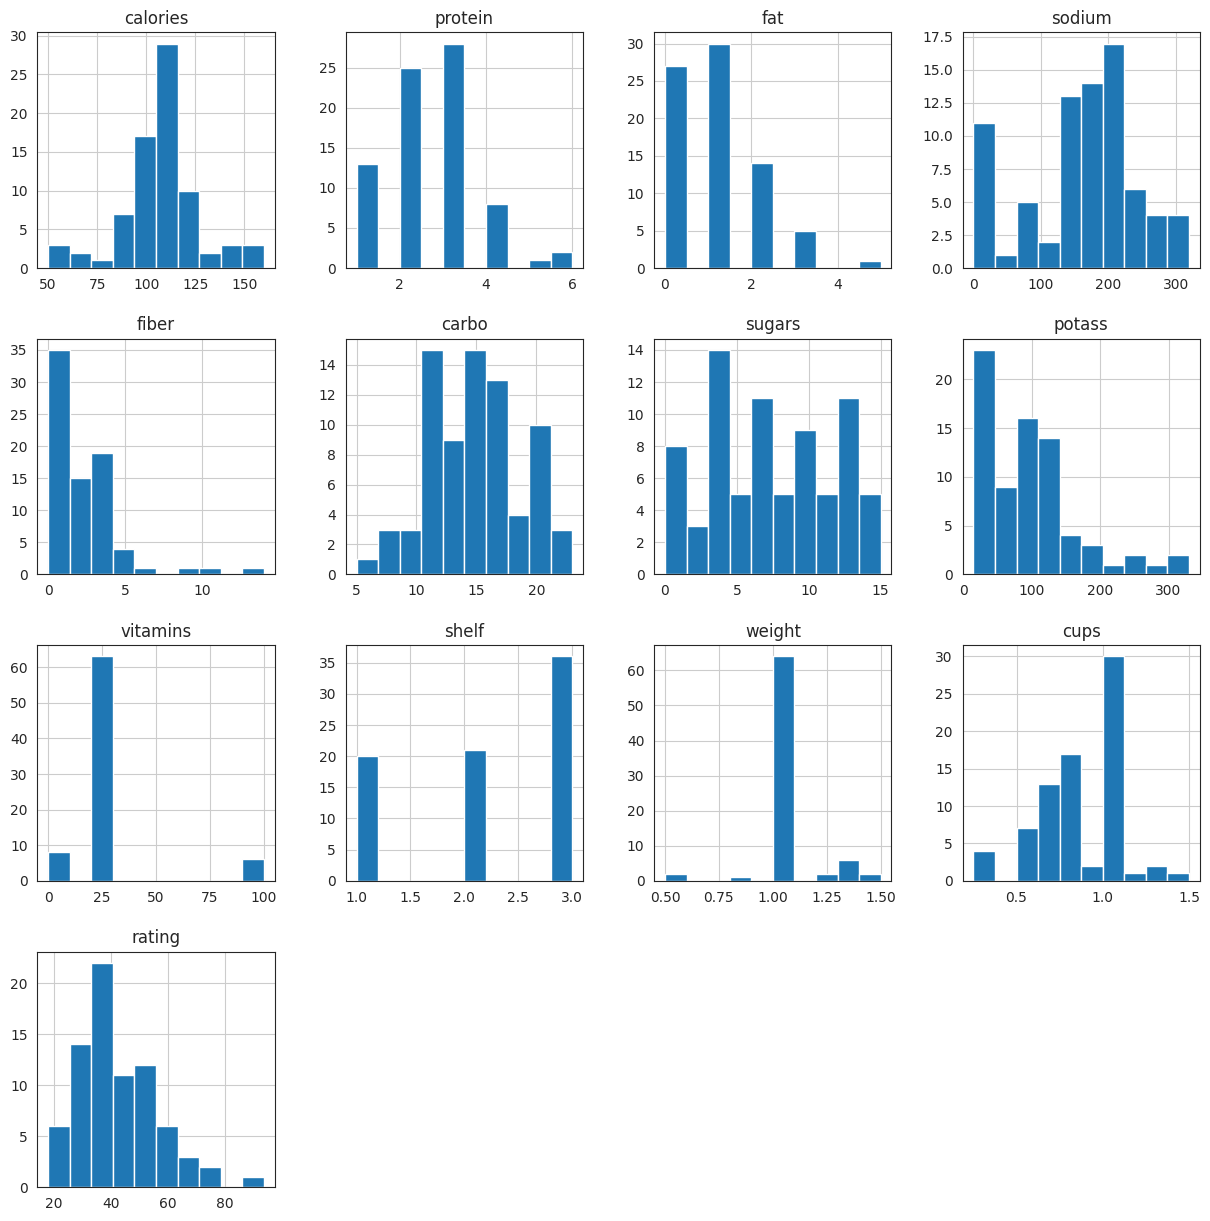

In [248]:
## Para mostrar las numericas.
cereals_df.select_dtypes(include=np.number).hist(figsize=(15,15))
plt.show()

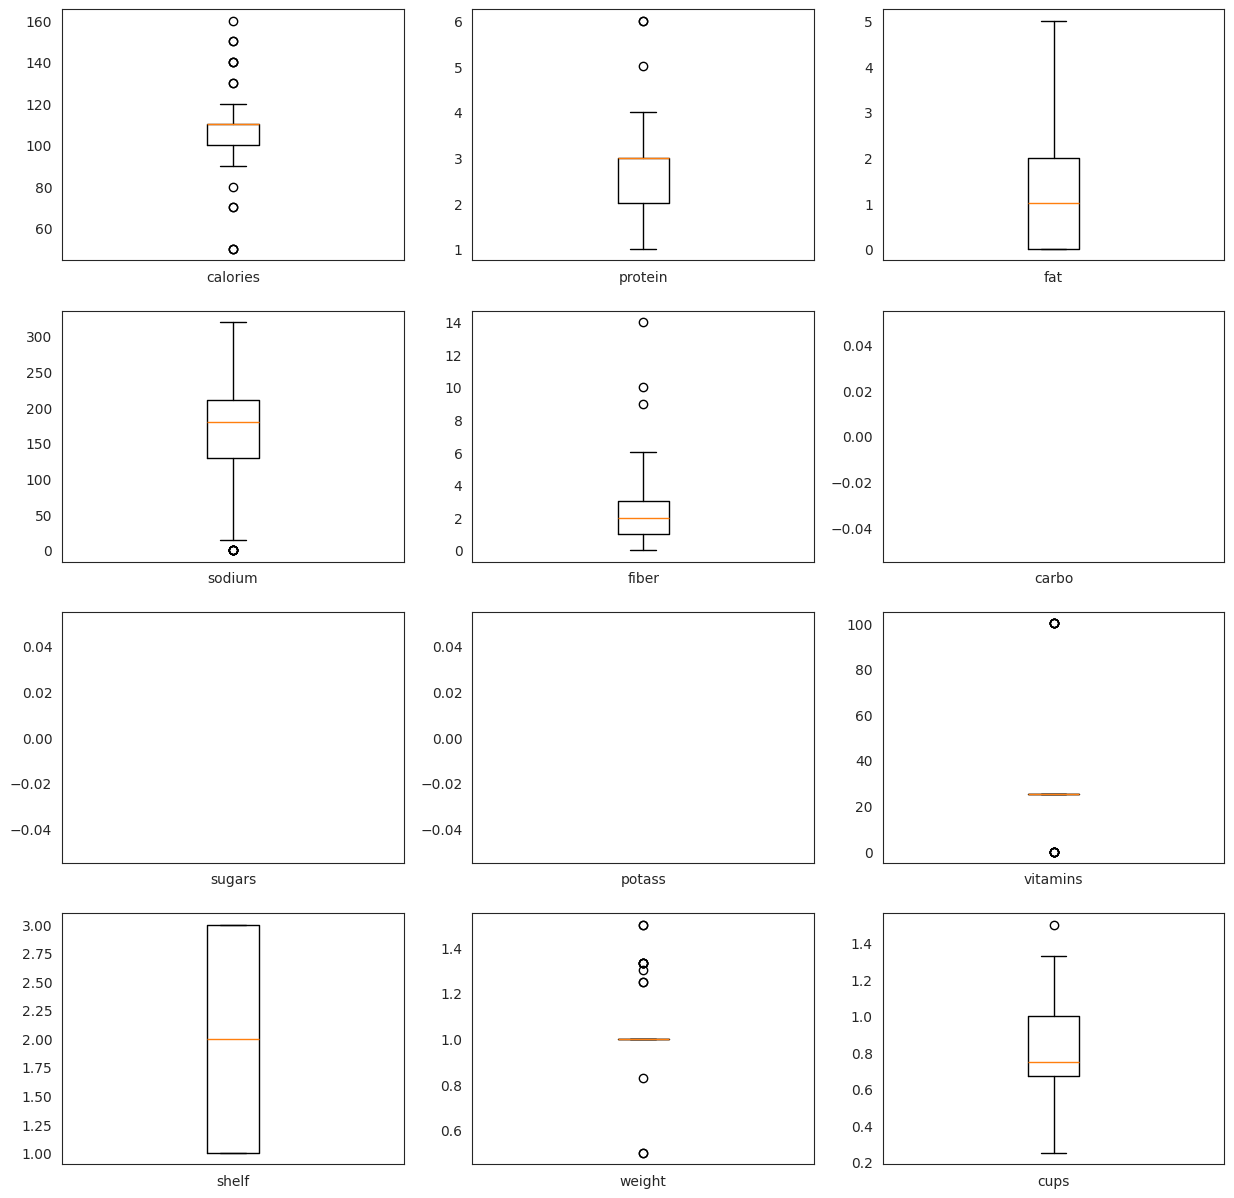

In [249]:
## TExto

fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(cereals_df[num_cols], axes):
  ax.boxplot(cereals_df[col], tick_labels=[f'{col}'])

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

<Axes: xlabel='mfr', ylabel='count'>

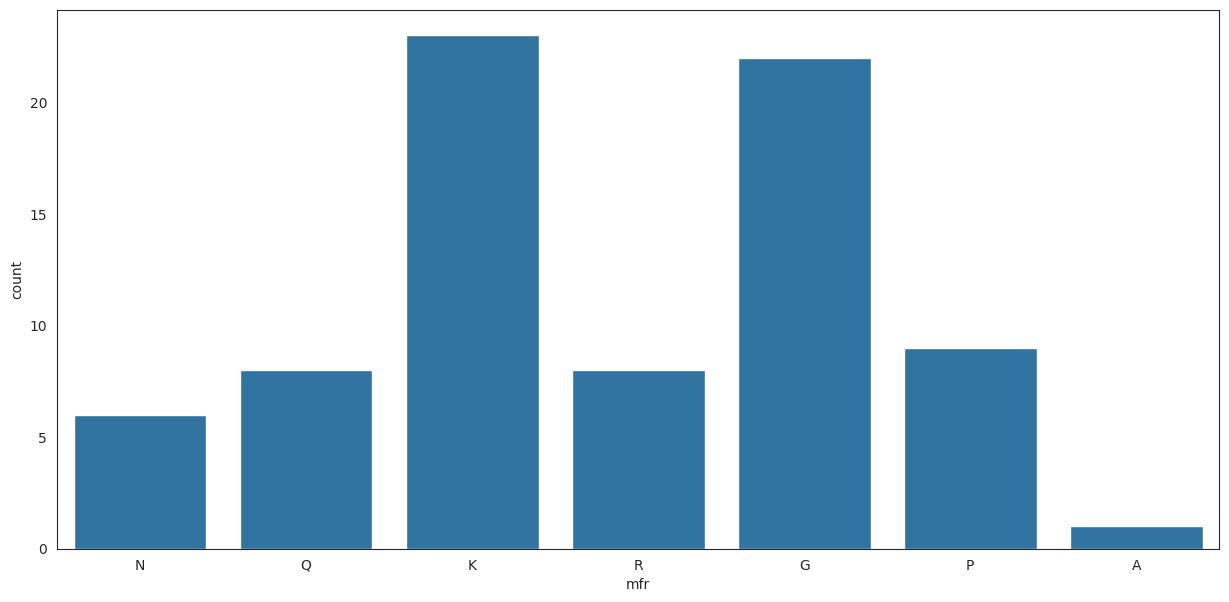

In [250]:
### Graficamos mfr
plt.figure(figsize=(15, 7))
sns.countplot(x=cereals_df['mfr'])

<Axes: xlabel='shelf', ylabel='count'>

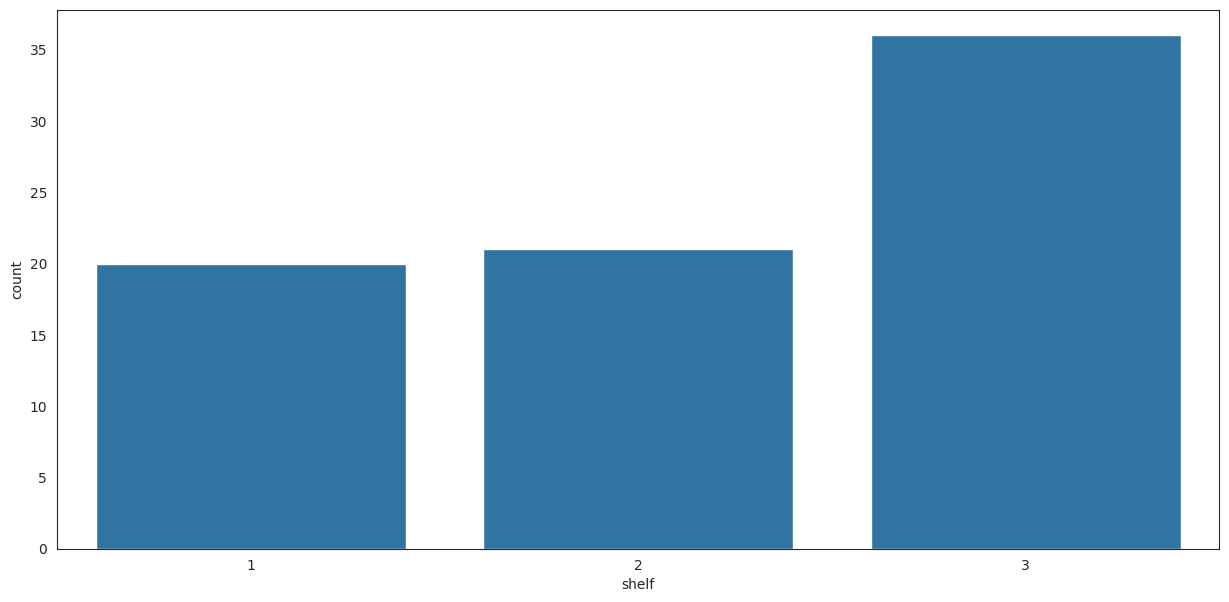

In [251]:
### Graficamos shelf
plt.figure(figsize=(15, 7))
sns.countplot(x=cereals_df['shelf'])

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

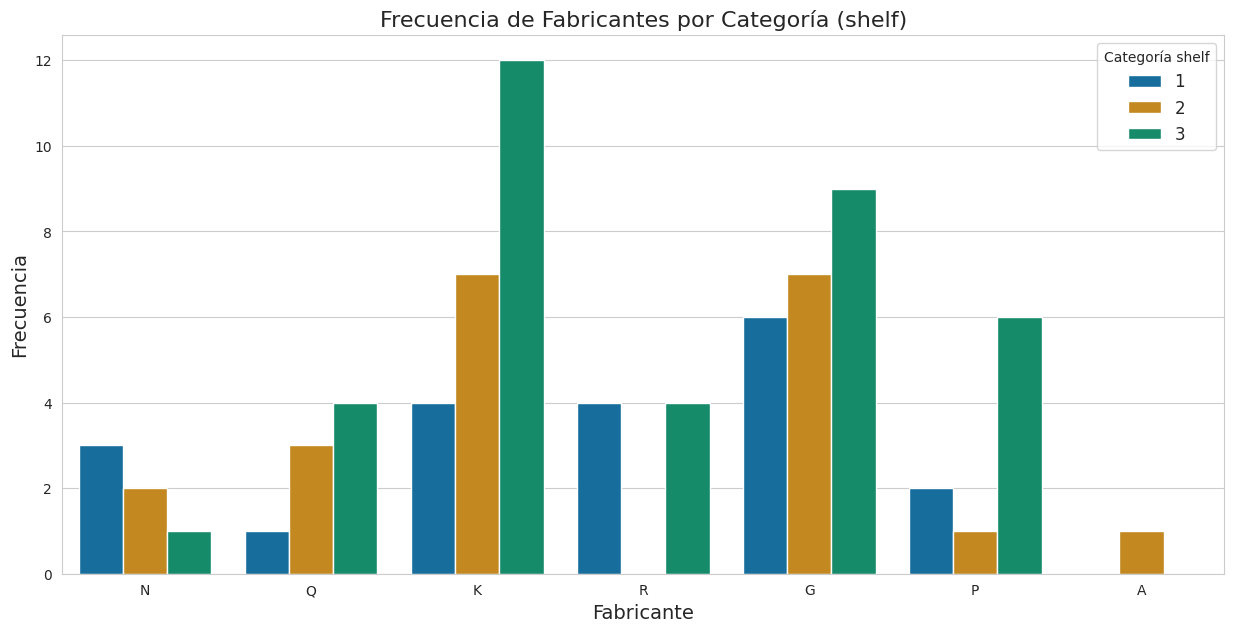

In [252]:
# Configurar el estilo de Seaborn
sns.set_style('whitegrid')

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 7))

# Crear el gráfico de barras agrupadas
sns.countplot(data=cereals_df, x='mfr', hue='shelf', palette='colorblind')

# Agregar etiquetas y título
plt.title('Frecuencia de Fabricantes por Categoría (shelf)', fontsize=16)
plt.xlabel('Fabricante', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend(title='Categoría shelf', fontsize=12)

# Mostrar la gráfica
plt.show()

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [253]:
##algun valor del describe?

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [254]:
# Ordenar el DataFrame por la columna 'rating' en orden descendente
top_10 = cereals_df.sort_values(by='rating', ascending=False).head(10)

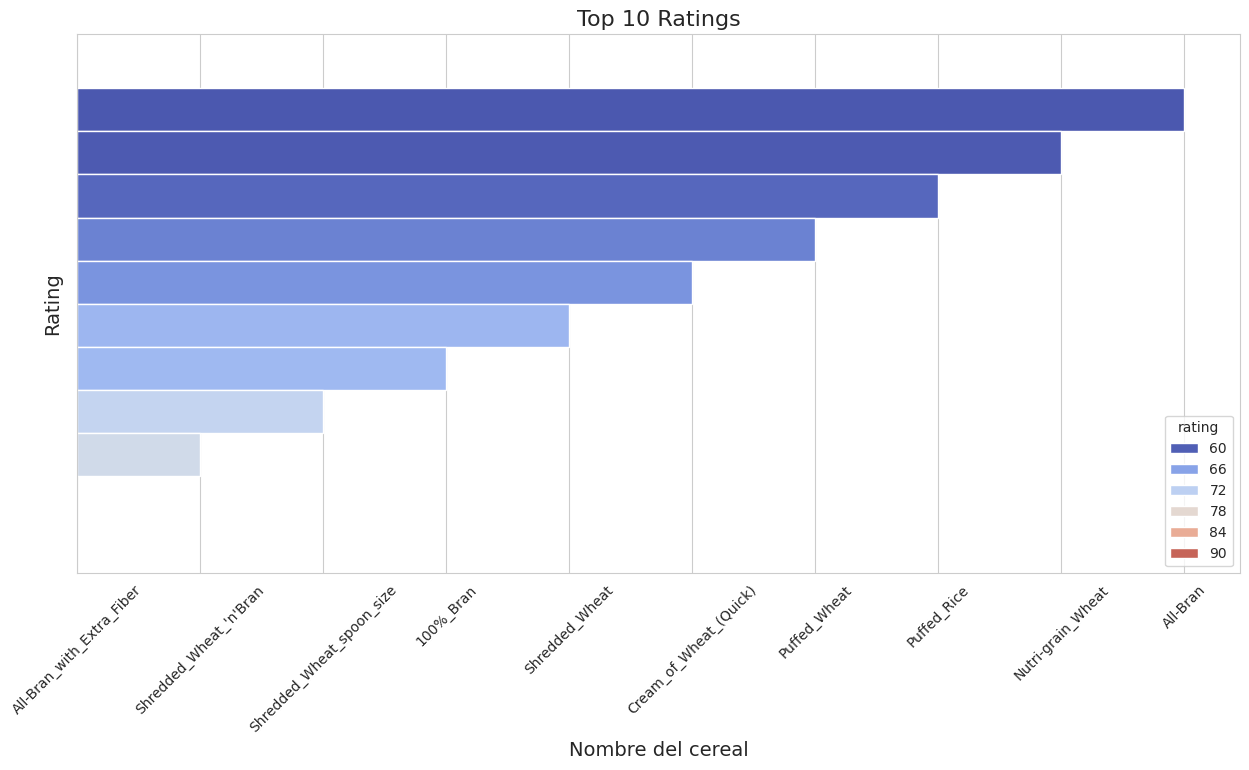

In [255]:

# Configurar el estilo de Seaborn
sns.set_style('whitegrid')

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 7))

# Crear el gráfico de barras vertical
sns.barplot(data=top_10, x='name', hue='rating', palette='coolwarm')  # Asegúrate de que 'name' y 'rating' existan en top_10

# Agregar etiquetas y título
plt.title('Top 10 Ratings', fontsize=16)
plt.xlabel('Nombre del cereal', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Rating', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.show()

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

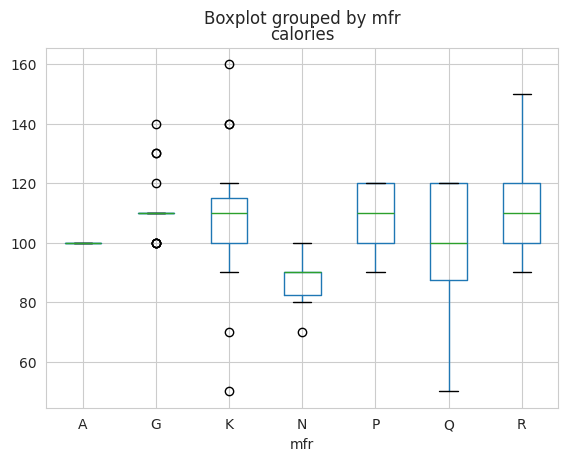

In [256]:
# Pandas
cereals_df.boxplot(column='calories', by='mfr') # ---> Pandas
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

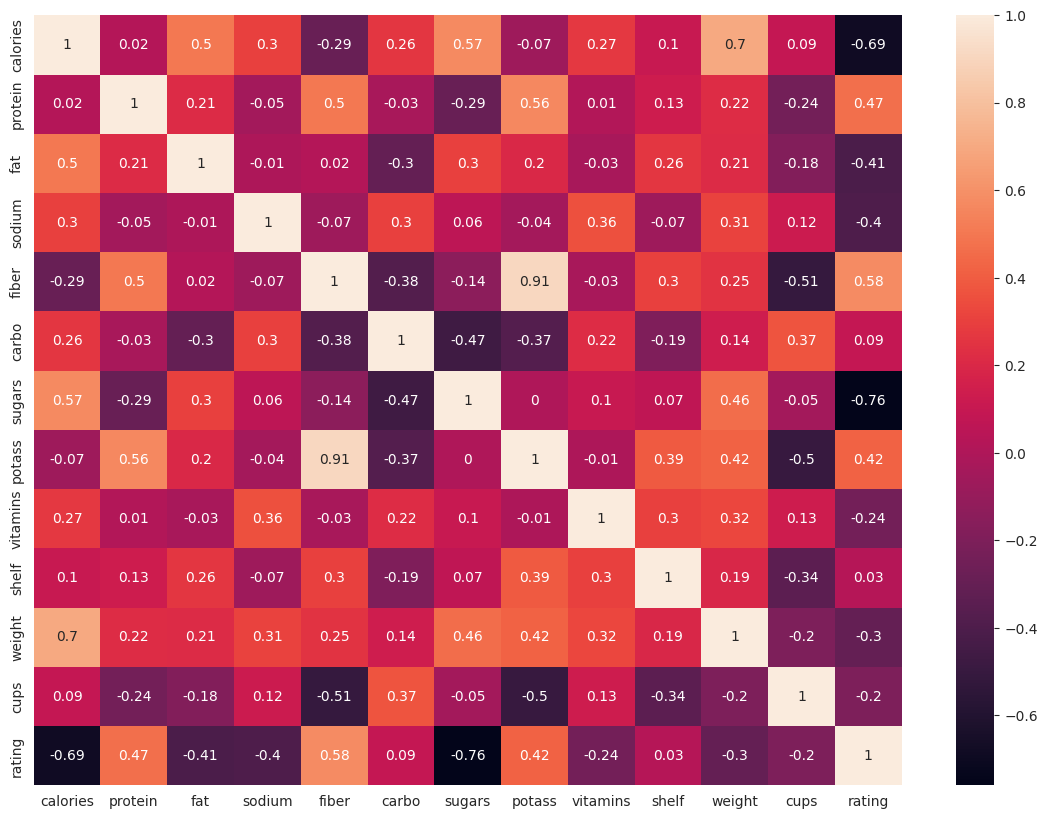

In [257]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(cereals_df.corr(numeric_only=True),2), annot = True) # ---> Seaborn
plt.show()

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [258]:
# Comprobando valores faltantes
cereals_df.isna().sum().to_frame()

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,1
sugars,1


In [259]:
# Eliminar todos los registros con datos faltantes
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)
cereals_df


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [260]:
# Comprobando valores faltantes
cereals_df.isna().sum().to_frame()

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [261]:
# Separating out the features
x = cereals_df.iloc[:,0:-1]
# Separating out the target
y = cereals_df.loc[:,'rating']

In [262]:
total_components = x.shape[1]
total_components

15

In [263]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x = x.select_dtypes(include=['int64', 'float64'])
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332,  0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332, -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332, -0.30592203]])

In [264]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,-0.247787,-0.124799,-0.046331,-0.238706,0.021342
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,0.895201,-0.835394,0.595071,-0.069954,-0.089523
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,0.182089,0.139267,-0.090776,0.488302,-0.035570
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,0.865569,-0.682678,-0.099300,-0.708471,0.108198
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,-0.808361,-0.712896,0.100511,-0.093129,-0.076342
...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,0.475067,1.161330,0.495373,0.749484,-0.773891,1.520184,0.690165,0.353600,0.017534,0.281347,0.108000
70,-1.595568,0.574653,-1.671901,0.380863,-0.489233,0.116453,-0.204196,0.259556,-0.021133,0.100748,-0.107726,0.101983
71,-0.134252,-0.612590,1.181098,-1.357046,-0.190222,0.163728,0.799693,-0.616101,-0.591177,-0.112252,0.107794,0.051736
72,-0.674537,-0.568589,1.163186,-1.330649,0.088594,0.644712,-0.247744,0.009124,-0.604610,0.008312,-0.025462,0.027293


<Axes: xlabel='0', ylabel='1'>

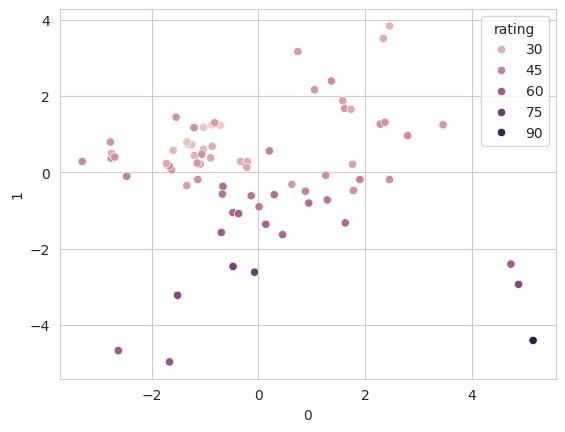

In [265]:
sns.scatterplot(x=x_projected[0],y=x_projected[1],hue=y)

In [266]:
print("valores propios:", list(np.round(pca.explained_variance_, decimals=5)))

valores propios: [np.float64(3.36485), np.float64(2.68343), np.float64(1.81049), np.float64(1.03151), np.float64(0.99776), np.float64(0.69923), np.float64(0.66888), np.float64(0.42177), np.float64(0.31803), np.float64(0.09305), np.float64(0.05706), np.float64(0.01831)]


In [267]:
print("Porcentaje:", pca.explained_variance_ratio_*100)

Porcentaje: [27.66148972 22.05974922 14.88354951  8.47975151  8.20232364  5.74815586
  5.49871329  3.46722281  2.61442284  0.76497634  0.46911013  0.15053512]


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

In [268]:
for i in range(len(pca.explained_variance_ratio_)):
    print(f"The percentage of variance explained by principal component {i+1} is {pca.explained_variance_ratio_[i]*100:.0f} %")

The percentage of variance explained by principal component 1 is 28 %
The percentage of variance explained by principal component 2 is 22 %
The percentage of variance explained by principal component 3 is 15 %
The percentage of variance explained by principal component 4 is 8 %
The percentage of variance explained by principal component 5 is 8 %
The percentage of variance explained by principal component 6 is 6 %
The percentage of variance explained by principal component 7 is 5 %
The percentage of variance explained by principal component 8 is 3 %
The percentage of variance explained by principal component 9 is 3 %
The percentage of variance explained by principal component 10 is 1 %
The percentage of variance explained by principal component 11 is 0 %
The percentage of variance explained by principal component 12 is 0 %


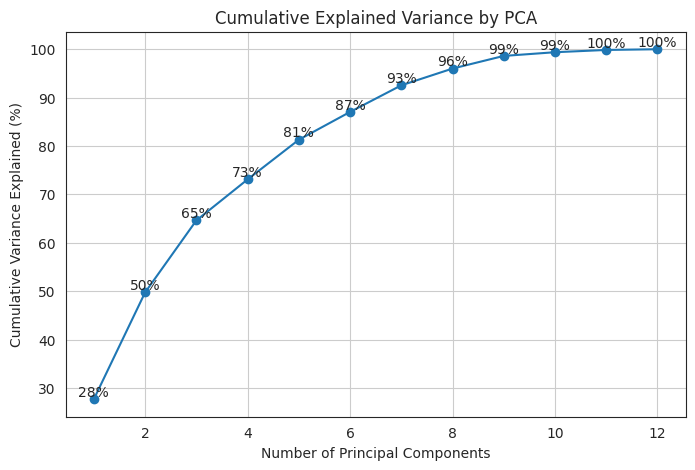

In [269]:
sns.set_style('white')

labels = np.cumsum(pca.explained_variance_ratio_) * 100

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(labels) + 1), labels, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)


for i in range(len(labels)):
    plt.text(i + 1, labels[i], str(format(labels[i], '.0f')) + '%', ha='center', va='bottom')

plt.show()

In [270]:
# Select the number of components
num_components = 12
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principal component 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principal component 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
Principal component 4,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683
Principal component 5,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826
Principal component 6,0.196806,0.176822,0.299822,0.462005,0.084635,0.446257,0.061289,0.068499,0.279949,0.133268,0.316544,0.464295
Principal component 7,0.062276,0.260647,0.247778,0.608269,0.095668,0.026962,0.186843,0.147455,0.168034,0.124162,0.186826,0.593052
Principal component 8,0.004882,0.418610,0.054129,0.167525,0.218240,0.172049,0.067793,0.265667,0.460537,0.416013,0.076551,0.500321
Principal component 9,0.043225,0.518397,0.438048,0.247337,0.258082,0.135796,0.251199,0.186550,0.337770,0.415500,0.067996,0.045104
Principal component 10,0.495843,0.019565,0.147950,0.005456,0.292832,0.243900,0.247413,0.185987,0.051953,0.047086,0.692720,0.077575


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


<ipython-input-271-b20965b0aeb8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pc_df.iloc[0:1],ci=None)


Text(0, 0.5, 'feature importance for PC1')

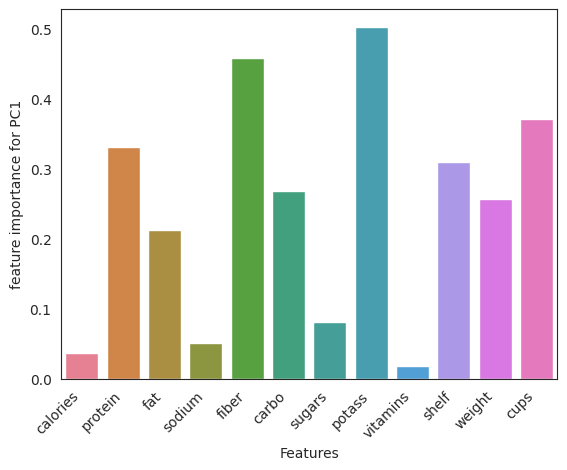

In [271]:
sns.barplot(data=pc_df.iloc[0:1],ci=None)
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.ylabel('feature importance for PC1')

In [272]:
three_most=pc_df.iloc[0:1].abs().sum().sort_values(ascending=False).head(3)
three_most

,0
potass,0.502603
fiber,0.458623
cups,0.371154


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [273]:
from sklearn.preprocessing import OneHotEncoder
data = cereals_df[['mfr', 'type']]
encoder = OneHotEncoder(drop='first',sparse_output=False)
onehot_df=pd.DataFrame(encoder.fit_transform(data),columns=encoder.get_feature_names_out())
onehot_df

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [274]:
minv = pd.DataFrame(x_projected.iloc[:, :7])
df10 = pd.concat([minv,onehot_df,y],axis=1)
print(df10)
df10.to_csv('cereals_pca.csv', index=False)

           0         1         2         3         4         5         6  \
0   4.870399 -2.934238 -0.055266  0.244647 -1.102035  0.904575  0.235388   
1   1.761110  0.210993 -3.014058 -0.494129  3.275506  1.065041 -0.489640   
2   4.727161 -2.402254  0.869028 -0.095823 -1.357388  1.393861  1.210340   
3   5.142814 -4.401826  1.883153  0.209854 -1.662387  0.955808 -0.289695   
4  -0.332394  0.284619 -1.490929 -0.944313 -0.311262  0.828872  0.493652   
..       ...       ...       ...       ...       ...       ...       ...   
69 -1.059199  0.475067  1.161330  0.495373  0.749484 -0.773891  1.520184   
70 -1.595568  0.574653 -1.671901  0.380863 -0.489233  0.116453 -0.204196   
71 -0.134252 -0.612590  1.181098 -1.357046 -0.190222  0.163728  0.799693   
72 -0.674537 -0.568589  1.163186 -1.330649  0.088594  0.644712 -0.247744   
73 -1.143818  0.242767 -0.212062 -0.938300 -0.474932 -0.049165  0.559350   

    mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  type_H     rating  
0     0.0    0.0    1